<a href="https://colab.research.google.com/github/xiaxiazainuli/deepchem/blob/master/%E4%BC%98%E5%8C%96%E7%89%88%E6%9C%ACSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 46.5 MB/s eta 0:00:00


In [2]:
pip install pandas

In [3]:
pip install matplotlib

In [4]:
pip install scikit-learn

In [5]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00


In [6]:
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem as ch
from rdkit.Chem import Draw as d
from rdkit import DataStructs
import pandas as pd
from rdkit.Chem import rdMolDescriptors as rdescriptors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import csv
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
import sklearn
from rdkit.Chem import PandasTools, Descriptors, MolFromSmiles
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from rdkit import Chem
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import torch
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
csv_path = '/content/drive/My Drive/bixuchenggong11.CSV'
df = pd.read_csv(csv_path, usecols=[1, 2, 3])
df.iloc[35:42]

,name,activity,smiles
35,6a,0,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N(C4CC4)CO)C...
36,7a,0,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N(C4CC4)COC)...
37,8a,0,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N(C4CC4)COCC...
38,9a,1,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N(C4CC4)COCC...
39,10a,0,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N(C4CC4)COC(...
40,11a,0,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N(C4CC4)COCC...
41,12a,0,ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N(C4CC4)CS)C...


In [9]:
with open ('/content/drive/My Drive/bixuchenggong11.CSV', 'r') as f:
    content_raw = list((csv.reader(f, delimiter = '\t')))
len(content_raw)

269

In [10]:
content=[]
for i in range(0,len(content_raw)):
    if i == 0:
        chembl_id=content_raw[i][0]
        content.append(content_raw[i])
    elif content_raw[i][0]!=chembl_id:
        chembl_id=content_raw[i][0]
        content.append(content_raw[i])

In [11]:
new_content = content[1:]
new_content = [''.join(sublist) for sublist in new_content]

In [40]:
import rdkit.Chem as ch  # 导入化学信息处理库
names = []
smiles = []
mols = []

# 遍历 new_content 列表
for item in new_content:
    parts = item.split(',')
    names.append(parts[1].strip())
    smiles.append(parts[3].strip())
    mols.append(ch.MolFromSmiles(parts[3].strip()))  # 分子结构转换并添加到 mols 列表中

In [41]:
activity = []

for item in new_content:
    if item.strip():
        parts = item.split(',')
        try:
            activity.append(float(parts[2]))
        except ValueError:
            print("Error: Unable to convert string to float:", parts[2])

print("Activity:", activity)

Activity: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [43]:
import rdkit.Chem as Chem

# 定义一个函数来提取分子中的氢键数量
def extract_hydrogen_bonds_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # 使用 GetSubstructMatches 函数查找分子中的氢键
        hydrogen_bonds = mol.GetSubstructMatches(Chem.MolFromSmarts('[OH]'))
        if hydrogen_bonds:
            return len(hydrogen_bonds)
        else:
            return 0
    else:
        print("Invalid SMILES:", smiles)
        return None

# 提取每个化合物的氢键数量
hydrogen_bonds_counts = [extract_hydrogen_bonds_count(sm) for sm in smiles]
for i, count in enumerate(hydrogen_bonds_counts):
    print(f"SMILES {i+1}: Hydrogen bonds count = {count}")

SMILES 1: Hydrogen bonds count = 0
SMILES 2: Hydrogen bonds count = 0
SMILES 3: Hydrogen bonds count = 0
SMILES 4: Hydrogen bonds count = 0
SMILES 5: Hydrogen bonds count = 0
SMILES 6: Hydrogen bonds count = 0
SMILES 7: Hydrogen bonds count = 0
SMILES 8: Hydrogen bonds count = 0
SMILES 9: Hydrogen bonds count = 0
SMILES 10: Hydrogen bonds count = 0
SMILES 11: Hydrogen bonds count = 0
SMILES 12: Hydrogen bonds count = 0
SMILES 13: Hydrogen bonds count = 0
SMILES 14: Hydrogen bonds count = 0
SMILES 15: Hydrogen bonds count = 0
SMILES 16: Hydrogen bonds count = 0
SMILES 17: Hydrogen bonds count = 0
SMILES 18: Hydrogen bonds count = 0
SMILES 19: Hydrogen bonds count = 0
SMILES 20: Hydrogen bonds count = 0
SMILES 21: Hydrogen bonds count = 0
SMILES 22: Hydrogen bonds count = 0
SMILES 23: Hydrogen bonds count = 0
SMILES 24: Hydrogen bonds count = 0
SMILES 25: Hydrogen bonds count = 0
SMILES 26: Hydrogen bonds count = 0
SMILES 27: Hydrogen bonds count = 0
SMILES 28: Hydrogen bonds count = 0
S

In [44]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
wiener_indices = []
for smile in smiles:
    mol = Chem.MolFromSmiles(smile)
    if mol:
        wiener_index = Descriptors.MolWt(mol)
        wiener_indices.append(wiener_index)
    else:
        print(f"Invalid SMILES: {smile}")
        wiener_indices.append(None)
dataframe_features = pd.DataFrame({
    'Name': names,
    'Activity': activity,
    'SMILES': smiles,
    'Wiener Index': wiener_indices
})

print(dataframe_features)

for index, value in enumerate(wiener_indices):
    print(f"Type of wiener_indices[{index}]: {type(value)}")

                 Name  Activity  \
0                 ser       1.0   
1                 DDP       0.0   
2                  5a       0.0   
3                  5b       0.0   
4                  5c       0.0   
..                ...       ...   
263  ZINC000100222082       1.0   
264  ZINC000100222085       1.0   
265  ZINC000100222088       1.0   
266  ZINC000100222091       1.0   
267  ZINC000100222094       1.0   

                                                SMILES  Wiener Index  
0      ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC)CC2)C=C1Cl       306.236  
1    ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](N(C)C)CC2)C=...       320.263  
2     ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCC)CC2)C=C1Cl       320.263  
3    ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCC)CC2)C=C1Cl       334.290  
4    ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NCCCCC)CC2)C...       362.344  
..                                                 ...           ...  
263        O=C1c2ccccc2[C@H](c2ccc(Cl)c(Cl)c2)C[C@H]1O       307.176  
264        

In [45]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, rdmolops, rdMolDescriptors, GraphDescriptors
from sklearn.preprocessing import MinMaxScaler
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys
import numpy as np

import pandas as pd
from rdkit import Chem
from rdkit.Chem import MACCSkeys

from rdkit.Chem import GetSymmSSSR

from rdkit.Chem import GetSymmSSSR

# 提取环特征
def extract_ring_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None
    ring_counts = {'total_rings': Chem.rdMolDescriptors.CalcNumRings(mol)}
    num_rings = ring_counts['total_rings']
    for size in range(3, 7):
        try:
            ring_counts[f'ring_size_{size}'] = len(Chem.GetSymmSSSR(mol, maxPathLength=size, minToFind=size))
        except:
            ring_counts[f'ring_size_{size}'] = 0
    return ring_counts, num_rings
dataframe_features = pd.DataFrame(columns=['num_rings'])
for i, smiles_str in enumerate(smiles):
    features_dict, num_rings = extract_ring_features(smiles_str)
    if features_dict is not None:
        # 将提取的特征添加到DataFrame中
        dataframe_features = pd.concat([dataframe_features, pd.DataFrame([features_dict])], ignore_index=True)




print(dataframe_features)



# 定义提取原子数量的函数
def extract_atom_count(mol, atom_symbols):
    atom_counts = {symbol: 0 for symbol in atom_symbols}
    for atom in mol.GetAtoms():
        symbol = atom.GetSymbol()
        if symbol in atom_counts:
            atom_counts[symbol] += 1
    return atom_counts



# 定义提取键数量的函数
def extract_bond_count(mol, bond_type):
    bond_count = 0
    for bond in mol.GetBonds():
        if bond.GetBondType() == bond_type:
            bond_count += 1
    return bond_count

# 定义提取特定类型键数量的函数
def extract_bond_type_count(mol, bond_type_str):
    bond_counts = {'single': 0, 'double': 0, 'triple': 0, 'aromatic': 0}
    for bond in mol.GetBonds():
        bond_type = str(bond.GetBondType()).lower()
        if bond_type == bond_type_str:
            bond_counts[bond_type] += 1
        elif bond.GetIsAromatic() and bond_type_str == 'aromatic':
            bond_counts['aromatic'] += 1
    return bond_counts[bond_type_str]
def extract_ring_features(mol):
    ring_counts = {'total_rings': Chem.rdMolDescriptors.CalcNumRings(mol)}
    for size in range(3, 11):
        try:
            ring_counts[f'ring_size_{size}'] = len(Chem.GetSymmSSSR(mol, maxPathLength=size, minToFind=size))
        except:
            ring_counts[f'ring_size_{size}'] = 0
    return ring_counts
# 提取拓扑特征
def extract_topology_features(mol):
    topology_features = {}

    topology_features['balaban_j'] = GraphDescriptors.BalabanJ(mol)
    return topology_features



# 定义提取特征的函数
def extract_features(smiles):
    features_list = []
    for smiles in smiles:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            features = {}
            features['num_atoms'] = mol.GetNumAtoms()
            features['num_heavy_atoms'] = Descriptors.HeavyAtomCount(mol)
            features['num_bonds'] = mol.GetNumBonds()

            features['num_rotatable_bonds'] = Descriptors.NumRotatableBonds(mol)
            features['num_aromatic_rings'] = Descriptors.NumAromaticRings(mol)
            features['num_saturated_rings'] = Descriptors.NumSaturatedRings(mol)
            features['num_aliphatic_rings'] = Descriptors.NumAliphaticRings(mol)


            # 物化性质描述符
            features['MW'] = Descriptors.MolWt(mol)
            features['logP'] = Descriptors.MolLogP(mol)
            features['TPSA'] = Descriptors.TPSA(mol)
            features['HBD'] = Descriptors.NumHDonors(mol)
            features['HBA'] = Descriptors.NumHAcceptors(mol)
            features['fraction_csp3'] = Descriptors.FractionCSP3(mol)
            features['num_saturated_carbocycles'] = Descriptors.NumSaturatedCarbocycles(mol)
            features['num_saturated_heterocycles'] = Descriptors.NumSaturatedHeterocycles(mol)
            features['num_aliphatic_heterocycles'] = Descriptors.NumAliphaticHeterocycles(mol)
            features['num_hydrogen_bonds'] = extract_hydrogen_bonds_count(smiles)
            features['single_bond'] = extract_bond_count(mol, Chem.BondType.SINGLE)
            features['double_bond'] = extract_bond_count(mol, Chem.BondType.DOUBLE)
            features['triple_bond'] = extract_bond_count(mol, Chem.BondType.TRIPLE)
            features['aromatic_bond'] = extract_bond_count(mol, Chem.BondType.AROMATIC)
            features['single'] = extract_bond_type_count(mol, 'single')
            features['aromatic'] = extract_bond_type_count(mol, 'aromatic')
            ring_feats = extract_ring_features(mol)
            for key, value in ring_feats.items():
                features[key] = value
            topo_feats = extract_topology_features(mol)
            for key, value in topo_feats.items():
                features[key] = value

            features_list.append(features)
        else:
            print("Invalid SMILES:", smiles)
    return pd.DataFrame(features_list)

# 提取特征并存储在DataFrame中
dataframe_features = extract_features(smiles)
dataframe_features['Activity'] = activity
dataframe_features['SMILES'] = smiles

wiener_indices_float = [float(val) if val is not None else None for val in wiener_indices]

dataframe_features['Wiener Index'] = wiener_indices_float
dataframe_features['num_rings'] = num_rings
print(dataframe_features)

    num_rings  total_rings  ring_size_3  ring_size_4  ring_size_5  ring_size_6
0         NaN          3.0          0.0          0.0          0.0          0.0
1         NaN          3.0          0.0          0.0          0.0          0.0
2         NaN          3.0          0.0          0.0          0.0          0.0
3         NaN          3.0          0.0          0.0          0.0          0.0
4         NaN          3.0          0.0          0.0          0.0          0.0
..        ...          ...          ...          ...          ...          ...
263       NaN          3.0          0.0          0.0          0.0          0.0
264       NaN          3.0          0.0          0.0          0.0          0.0
265       NaN          3.0          0.0          0.0          0.0          0.0
266       NaN          3.0          0.0          0.0          0.0          0.0
267       NaN          3.0          0.0          0.0          0.0          0.0

[268 rows x 6 columns]
     num_atoms  num_heavy_at

In [46]:
import pandas as pd

# 读取原始数据集
data = pd.read_csv('/content/drive/My Drive/shishikan.csv')
new_features = [
    'name',  'MW', 'Vol', 'Dense', 'nHA', 'nHD', 'TPSA', 'nRot',
    'nRing', 'MaxRing', 'nHet', 'fChar', 'nRig', 'Flex', 'nStereo', 'gasa', 'QED',
    'Synth', 'Fsp3', 'MCE-18', 'Natural Product-likeness', 'GSK', 'GoldenTriangle',
    'logS', 'logD', 'logP', 'mp', 'bp', 'pka_acidic', 'pka_basic', 'caco2', 'MDCK',
    'PAMPA', 'pgp_inh', 'pgp_sub', 'hia', 'f20', 'f30', 'f50', 'OATP1B1', 'OATP1B3',
    'BCRP', 'BSEP', 'BBB', 'MRP1', 'PPB', 'logVDss', 'Fu', 'CYP1A2-inh', 'CYP1A2-sub',
    'CYP2C19-inh', 'CYP2C19-sub', 'CYP2C9-inh', 'CYP2C9-sub', 'CYP2D6-inh', 'CYP2D6-sub',
    'CYP3A4-inh', 'CYP3A4-sub', 'CYP2B6-inh', 'CYP2B6-sub', 'CYP2C8-inh', 'LM-human',
    'cl-plasma', 't0.5', 'BCF', 'IGC50', 'LC50DM', 'LC50FM', 'hERG', 'SkinSen',
    'Respiratory', 'H-HT', 'Neurotoxicity-DI', 'Ototoxicity', 'Hematotoxicity',
    'Nephrotoxicity-DI', 'Genotoxicity', 'RPMI-8226', 'A549', 'HEK293', 'NR-AhR',
    'NR-AR', 'NR-AR-LBD', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
    'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53', 'Aggregators', 'Fluc',
    'Blue_fluorescence', 'Green_fluorescence', 'Reactive', 'Other_assay_interference',
    'Promiscuous'
]


dataframe_features = extract_features(smiles)

new_feature_data = data[new_features]

new_feature_data = new_feature_data.set_index(dataframe_features.index)


dataframe_features = pd.concat([dataframe_features, new_feature_data], axis=1)

In [47]:
# 删除值为0的特征列
dataframe_feature = dataframe_features.loc[:, (dataframe_features != 0).any()]
# 删除重复的特征列
dataframe_features = dataframe_features.loc[:, ~dataframe_features.columns.duplicated()]

In [48]:
import numpy as np
import pandas as pd

dataframe_feature_numeric = dataframe_feature.apply(pd.to_numeric, errors='coerce')

# 删除包含 NaN 值的行
dataframe_feature_numeric = dataframe_feature_numeric.dropna()

# 计算特征的方差
feature_variances = dataframe_feature_numeric.var()

# 计算方差的上四分位数作为阈值
threshold = np.percentile(feature_variances, 75)

print("上四分位数作为阈值：", threshold)

上四分位数作为阈值： 0.02738946314056747


In [49]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

numeric_columns = dataframe_feature.select_dtypes(include=['float64', 'int64']).columns

selector = VarianceThreshold(threshold=0.028)
selected_features = selector.fit_transform(dataframe_feature[numeric_columns])

# 获取被选择的特征索引
selected_indices = selector.get_support(indices=True)

print("被选择的特征索引：", selected_indices)


被选择的特征索引： [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  23  24  25  26  27  28  29  30  32  33  34  35  36  38  39
  40  42  43  45  47  48  49  51  52  53  54  55  56  57  58  62  63  67
  68  69  73  74  75  76  77  78  79  80  81  82  83  84  85  88  89  90
  91  92  93  94  95  96  97 102 103 105 107 109 111 112 113 114 116 118
 119 120 122 124 125 126 127]


In [50]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

numeric_columns = dataframe_feature.select_dtypes(include=['float64', 'int64']).columns


selector = VarianceThreshold(threshold=0.027)
selected_features = selector.fit_transform(dataframe_feature[numeric_columns])


selected_indices = selector.get_support(indices=True)


selected_feature_names = dataframe_feature[numeric_columns].columns[selected_indices]

selected_features_df = pd.DataFrame(selected_features, columns=selected_feature_names)

selected_features_df_unique = selected_features_df.loc[:,~selected_features_df.columns.duplicated()]


print("删除重复特征后的特征名字：", selected_features_df_unique.columns)
print(selected_features_df_unique.dtypes)

print("被选择的特征名字：", selected_feature_names)
print("\n删除重复特征后的特征数据：")
print(selected_features_df_unique)

删除重复特征后的特征名字： Index(['num_atoms', 'num_heavy_atoms', 'num_bonds', 'num_rotatable_bonds',
       'num_aromatic_rings', 'num_saturated_rings', 'num_aliphatic_rings',
       'MW', 'logP', 'TPSA', 'HBD', 'HBA', 'num_saturated_carbocycles',
       'num_saturated_heterocycles', 'num_aliphatic_heterocycles',
       'num_hydrogen_bonds', 'single_bond', 'double_bond', 'aromatic_bond',
       'single', 'aromatic', 'total_rings', 'balaban_j', 'Vol', 'nHA', 'nHD',
       'nRot', 'MaxRing', 'nHet', 'nRig', 'nStereo', 'gasa', 'Synth', 'MCE-18',
       'Natural Product-likeness', 'GSK', 'logS', 'logD', 'mp', 'bp',
       'pka_acidic', 'pka_basic', 'pgp_inh', 'pgp_sub', 'f50', 'OATP1B1',
       'OATP1B3', 'MRP1', 'PPB', 'logVDss', 'Fu', 'CYP1A2-inh', 'CYP1A2-sub',
       'CYP2C19-inh', 'CYP2C19-sub', 'CYP2C9-inh', 'CYP2C9-sub', 'CYP2D6-inh',
       'CYP2D6-sub', 'CYP3A4-inh', 'CYP2B6-sub', 'CYP2C8-inh', 'LM-human',
       'cl-plasma', 't0.5', 'BCF', 'IGC50', 'LC50DM', 'LC50FM', 'hERG',
       'Ototoxi

In [51]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

# 创建 Isolation Forest 模型并进行异常值检测
clf = IsolationForest(contamination=0.05, random_state=42)
outliers = clf.fit_predict(selected_features_df_unique)

# 将异常值标记为 -1，正常值为 1
selected_features_df_unique['outlier'] = outliers

# 提取异常值
outliers_df = selected_features_df_unique[selected_features_df_unique['outlier'] == -1]


print("Rows with outliers:")
print(outliers_df)

# 使用均值填充异常值
for col in selected_features_df_unique.columns:
    if col != 'outlier':

        col_mean = outliers_df[col].mean()

        selected_features_df_unique.loc[selected_features_df_unique['outlier'] == -1, col] = col_mean


selected_features_df_unique.drop('outlier', axis=1, inplace=True)

filled_features_df = selected_features_df_unique.copy()


print("Filled features dataset:")
print(filled_features_df)


Rows with outliers:
     num_atoms  num_heavy_atoms  num_bonds  num_rotatable_bonds  \
10        29.0             29.0       33.0                  3.0   
21        33.0             33.0       36.0                  4.0   
23        21.0             21.0       23.0                  3.0   
26        26.0             26.0       29.0                  4.0   
157       26.0             26.0       29.0                  4.0   
177       24.0             24.0       26.0                  4.0   
195       27.0             27.0       29.0                  6.0   
203       26.0             26.0       28.0                  4.0   
204       28.0             28.0       30.0                  5.0   
205       28.0             28.0       30.0                  5.0   
223       18.0             18.0       20.0                  2.0   
244       20.0             20.0       22.0                  1.0   
246       20.0             20.0       22.0                  1.0   
263       20.0             20.0       22.0

<ipython-input-51-07e45c1a3a94>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df_unique['outlier'] = outliers
<ipython-input-51-07e45c1a3a94>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df_unique.drop('outlier', axis=1, inplace=True)


In [52]:
dataframe_features = pd.DataFrame({
    'Activity': activity,
})

In [53]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import pandas as pd

X = filled_features_df.values  # 特征变量
y = dataframe_features['Activity'].values  # 目标变量

# 创建支持向量机（SVM）模型作为评估器
estimator = SVC(kernel='linear')  # 这里选择线性核

# 创建递归特征消除对象，保留最终特征数量为12
rfe = RFE(estimator, n_features_to_select=12, step=1)

# 拟合递归特征消除模型
rfe.fit(X, y)

selected_feature_indexes = rfe.get_support(indices=True)
selected_features = filled_features_df.columns[selected_feature_indexes]

print("Selected Features using RFE with SVM:")
print(selected_features)

selected_features_df_5 = filled_features_df[selected_features]
print("DataFrame with selected features based on RFE with SVM:")
print(selected_features_df_5)

Selected Features using RFE with SVM:
Index(['HBD', 'Natural Product-likeness', 'OATP1B1', 'CYP1A2-sub',
       'CYP2D6-inh', 'LM-human', 'LC50FM', 'Hematotoxicity', 'SR-HSE',
       'SR-MMP', 'Fluc', 'Promiscuous'],
      dtype='object')
DataFrame with selected features based on RFE with SVM:
          HBD  Natural Product-likeness   OATP1B1  CYP1A2-sub  CYP2D6-inh  \
0    1.000000                    0.1180  0.931887    0.999996    0.999766   
1    0.000000                   -0.1520  0.930609    0.999900    0.998208   
2    1.000000                    0.0530  0.247913    0.999772    0.999980   
3    1.000000                   -0.1830  0.602269    0.999931    0.999983   
4    1.000000                   -0.1050  0.489044    0.990098    0.999999   
..        ...                       ...       ...         ...         ...   
263  1.714286                   -0.1675  0.500789    0.676923    0.545728   
264  1.000000                    0.1180  0.246101    1.000000    0.983280   
265  1.00000

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(selected_features_df_5)

print("Variance Inflation Factors (VIF):")
print(vif_result)

Variance Inflation Factors (VIF):
                     Feature        VIF
0                        HBD   4.673960
1   Natural Product-likeness   5.846309
2                    OATP1B1   7.645981
3                 CYP1A2-sub  28.253977
4                 CYP2D6-inh  19.747913
5                   LM-human   9.727952
6                     LC50FM  79.092133
7             Hematotoxicity   7.157007
8                     SR-HSE   4.568013
9                     SR-MMP  17.416982
10                      Fluc   3.771040
11               Promiscuous   5.864861


In [55]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

selected_features_df_5 = filled_features_df[['HBD', 'Natural Product-likeness', 'OATP1B1', 'CYP1A2-sub',
                                           'CYP2D6-inh', 'LM-human', 'LC50FM', 'Hematotoxicity',
                                           'SR-HSE', 'SR-MMP', 'Fluc', 'Promiscuous']]

# 计算 VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(selected_features_df_5)

print("Variance Inflation Factors (VIF):")
print(vif_result)

# 根据 VIF 值选择要降维和保留的特征
features_to_reduce = vif_result[vif_result['VIF'] > 5]['Feature'].tolist()
features_to_keep = vif_result[vif_result['VIF'] <= 5]['Feature'].tolist()

# 使用 PCA 进行特征降维
pca = PCA(n_components=4)
reduced_features = pca.fit_transform(selected_features_df_5[features_to_reduce])

reduced_features_df = pd.DataFrame(data=reduced_features, columns=[f'PCA_Reduced_Feature_{i+1}' for i in range(pca.n_components)])

# 合并降维后的特征和保留的特征
final_selected_features_df = pd.concat([reduced_features_df, selected_features_df_5[features_to_keep]], axis=1)

print("Final DataFrame with selected features based on RFE with PCA (Reduced to 4 dimensions):")
print(final_selected_features_df.head())




Variance Inflation Factors (VIF):
                     Feature        VIF
0                        HBD   4.673960
1   Natural Product-likeness   5.846309
2                    OATP1B1   7.645981
3                 CYP1A2-sub  28.253977
4                 CYP2D6-inh  19.747913
5                   LM-human   9.727952
6                     LC50FM  79.092133
7             Hematotoxicity   7.157007
8                     SR-HSE   4.568013
9                     SR-MMP  17.416982
10                      Fluc   3.771040
11               Promiscuous   5.864861
Final DataFrame with selected features based on RFE with PCA (Reduced to 4 dimensions):
   PCA_Reduced_Feature_1  PCA_Reduced_Feature_2  PCA_Reduced_Feature_3  \
0               0.343758              -0.718197              -0.049523   
1              -0.191263              -0.296107               0.164698   
2               0.240565              -0.304627              -0.538967   
3               0.156029              -0.356215              -

In [56]:
dataframe_features = pd.DataFrame({
    'Activity': activity,
    'SMILES': smiles,
})

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = final_selected_features_df
y = dataframe_features['Activity']

# 划分训练集、验证集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=36)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=36)

# 定义 SVM 模型
svm_model = SVC(kernel='linear', C=5.0, probability=True, random_state=36)
bagging_model = BaggingClassifier(base_estimator=svm_model, n_estimators=5, random_state=0)

# 拟合（训练）模型
bagging_model.fit(X_train, y_train)

# 在验证集上预测
y_val_pred = bagging_model.predict(X_val)

# 评估模型性能（验证集）
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)
print("Validation Set Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print("Classification Report:")
print(val_report)

# 在测试集上预测概率
y_test_probs = bagging_model.predict_proba(X_test)[:, 1]
y_pred = bagging_model.predict(X_test)

# 评估模型性能（测试集）
accuracy = accuracy_score(y_test, y_pred)
test_report = classification_report(y_test, y_pred)
print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(test_report)
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import pandas as pd

def draw_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    img = Draw.MolToImage(mol)
    return img

test_smiles = dataframe_features.loc[X_test.index, 'SMILES']
test_actuals = y_test.values
test_probs = y_test_probs

results_df = pd.DataFrame({
    'SMILES': test_smiles,
    'Actual': test_actuals,
    'Predicted_Probability': test_probs
})

print("\nTest Set Predictions:")
print(results_df)

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

def draw_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    img = Draw.MolToImage(mol)
    return img

test_smiles = dataframe_features.loc[X_test.index, 'SMILES']
test_actuals = y_test.values
test_probs = y_test_probs

results_df = pd.DataFrame({
    'SMILES': test_smiles,
    'Actual': test_actuals,
    'Predicted_Probability': test_probs
})


print("\nTest Set Predictions:")
print(results_df)

def plot_molecules_in_row(results_df, num_per_row=8):
    num_molecules = len(results_df)
    num_rows = (num_molecules + num_per_row - 1) // num_per_row

    fig, axes = plt.subplots(num_rows, num_per_row, figsize=(num_per_row * 4, num_rows * 4))
    axes = axes.flatten()

    for idx, (index, row) in enumerate(results_df.iterrows()):
        smiles = row['SMILES']
        actual = row['Actual']
        prob = row['Predicted_Probability']

        img = draw_molecule(smiles)
        if img:
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f"Actual: {actual}\nProb: {prob:.2f}", fontsize=14)
        else:
            axes[idx].axis('off')

    for ax in axes[num_molecules:]:
        ax.axis('off')

    plt.tight_layout()

    save_path = '/content/molecules_plot.svg'
    plt.savefig(save_path, format='svg', bbox_inches='tight', dpi=600)
    plt.close()

    return save_path


svg_path = plot_molecules_in_row(results_df)

files.download(svg_path)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation Set Metrics:
Accuracy: 0.7714
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75        15
         1.0       0.83      0.75      0.79        20

    accuracy                           0.77        35
   macro avg       0.77      0.78      0.77        35
weighted avg       0.78      0.77      0.77        35


Test Set Metrics:
Accuracy: 0.9512
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        21
         1.0       0.95      0.95      0.95        20

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41


Test Set Predictions:
                                                SMILES  Actual  \
217      O=CN[C@@H]1CC[C@H](c2ccc(Cl)c(Cl)c2)c2ccccc21     1.0   
14   ClC1=CC=C([C@H]2C3=CC=CC=C3[C@@H](NC4=CC(OCO5)...     0.0   
12

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 计算准确率、召回率和 F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9512195121951219
Recall: 0.9512195121951219
F1-score: 0.9512195121951219


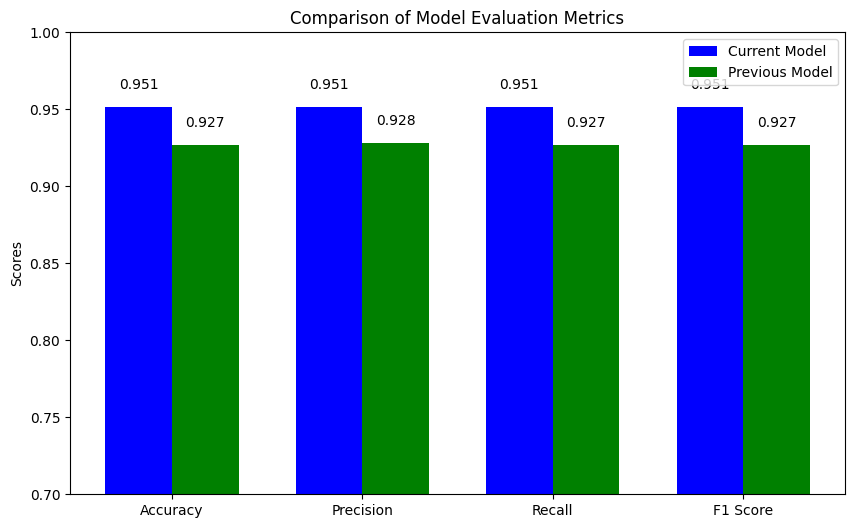

In [ ]:
import matplotlib.pyplot as plt

# Metrics for the current model (after adjustments)
metrics_current = {
    'Accuracy': 0.9513,
    'Precision': 0.9513,
    'Recall': 0.9513,
    'F1 Score': 0.9513
}

# Metrics for the previous model (replace with your actual metrics)
metrics_previous = {
    'Accuracy': 0.9268,
    'Precision': 0.9279,
    'Recall': 0.9268,
    'F1 Score': 0.9268
}

# Labels and scores for the bar plot
labels = list(metrics_current.keys())
current_scores = list(metrics_current.values())
previous_scores = list(metrics_previous.values())

# Plotting the grouped bar chart
x = range(len(labels))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_current = ax.bar(x, current_scores, width, label='Current Model', color='b')
bars_previous = ax.bar([p + width for p in x], previous_scores, width, label='Previous Model', color='g')

# Adding labels, title, and ticks
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Evaluation Metrics')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Adding text annotations for each bar
for bar in bars_current + bars_previous:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

# Adjusting y-axis limits
plt.ylim(0.5, 1.0)  # Limiting y-axis to range from 0.5 to 1.0

# Displaying the plot
plt.show()


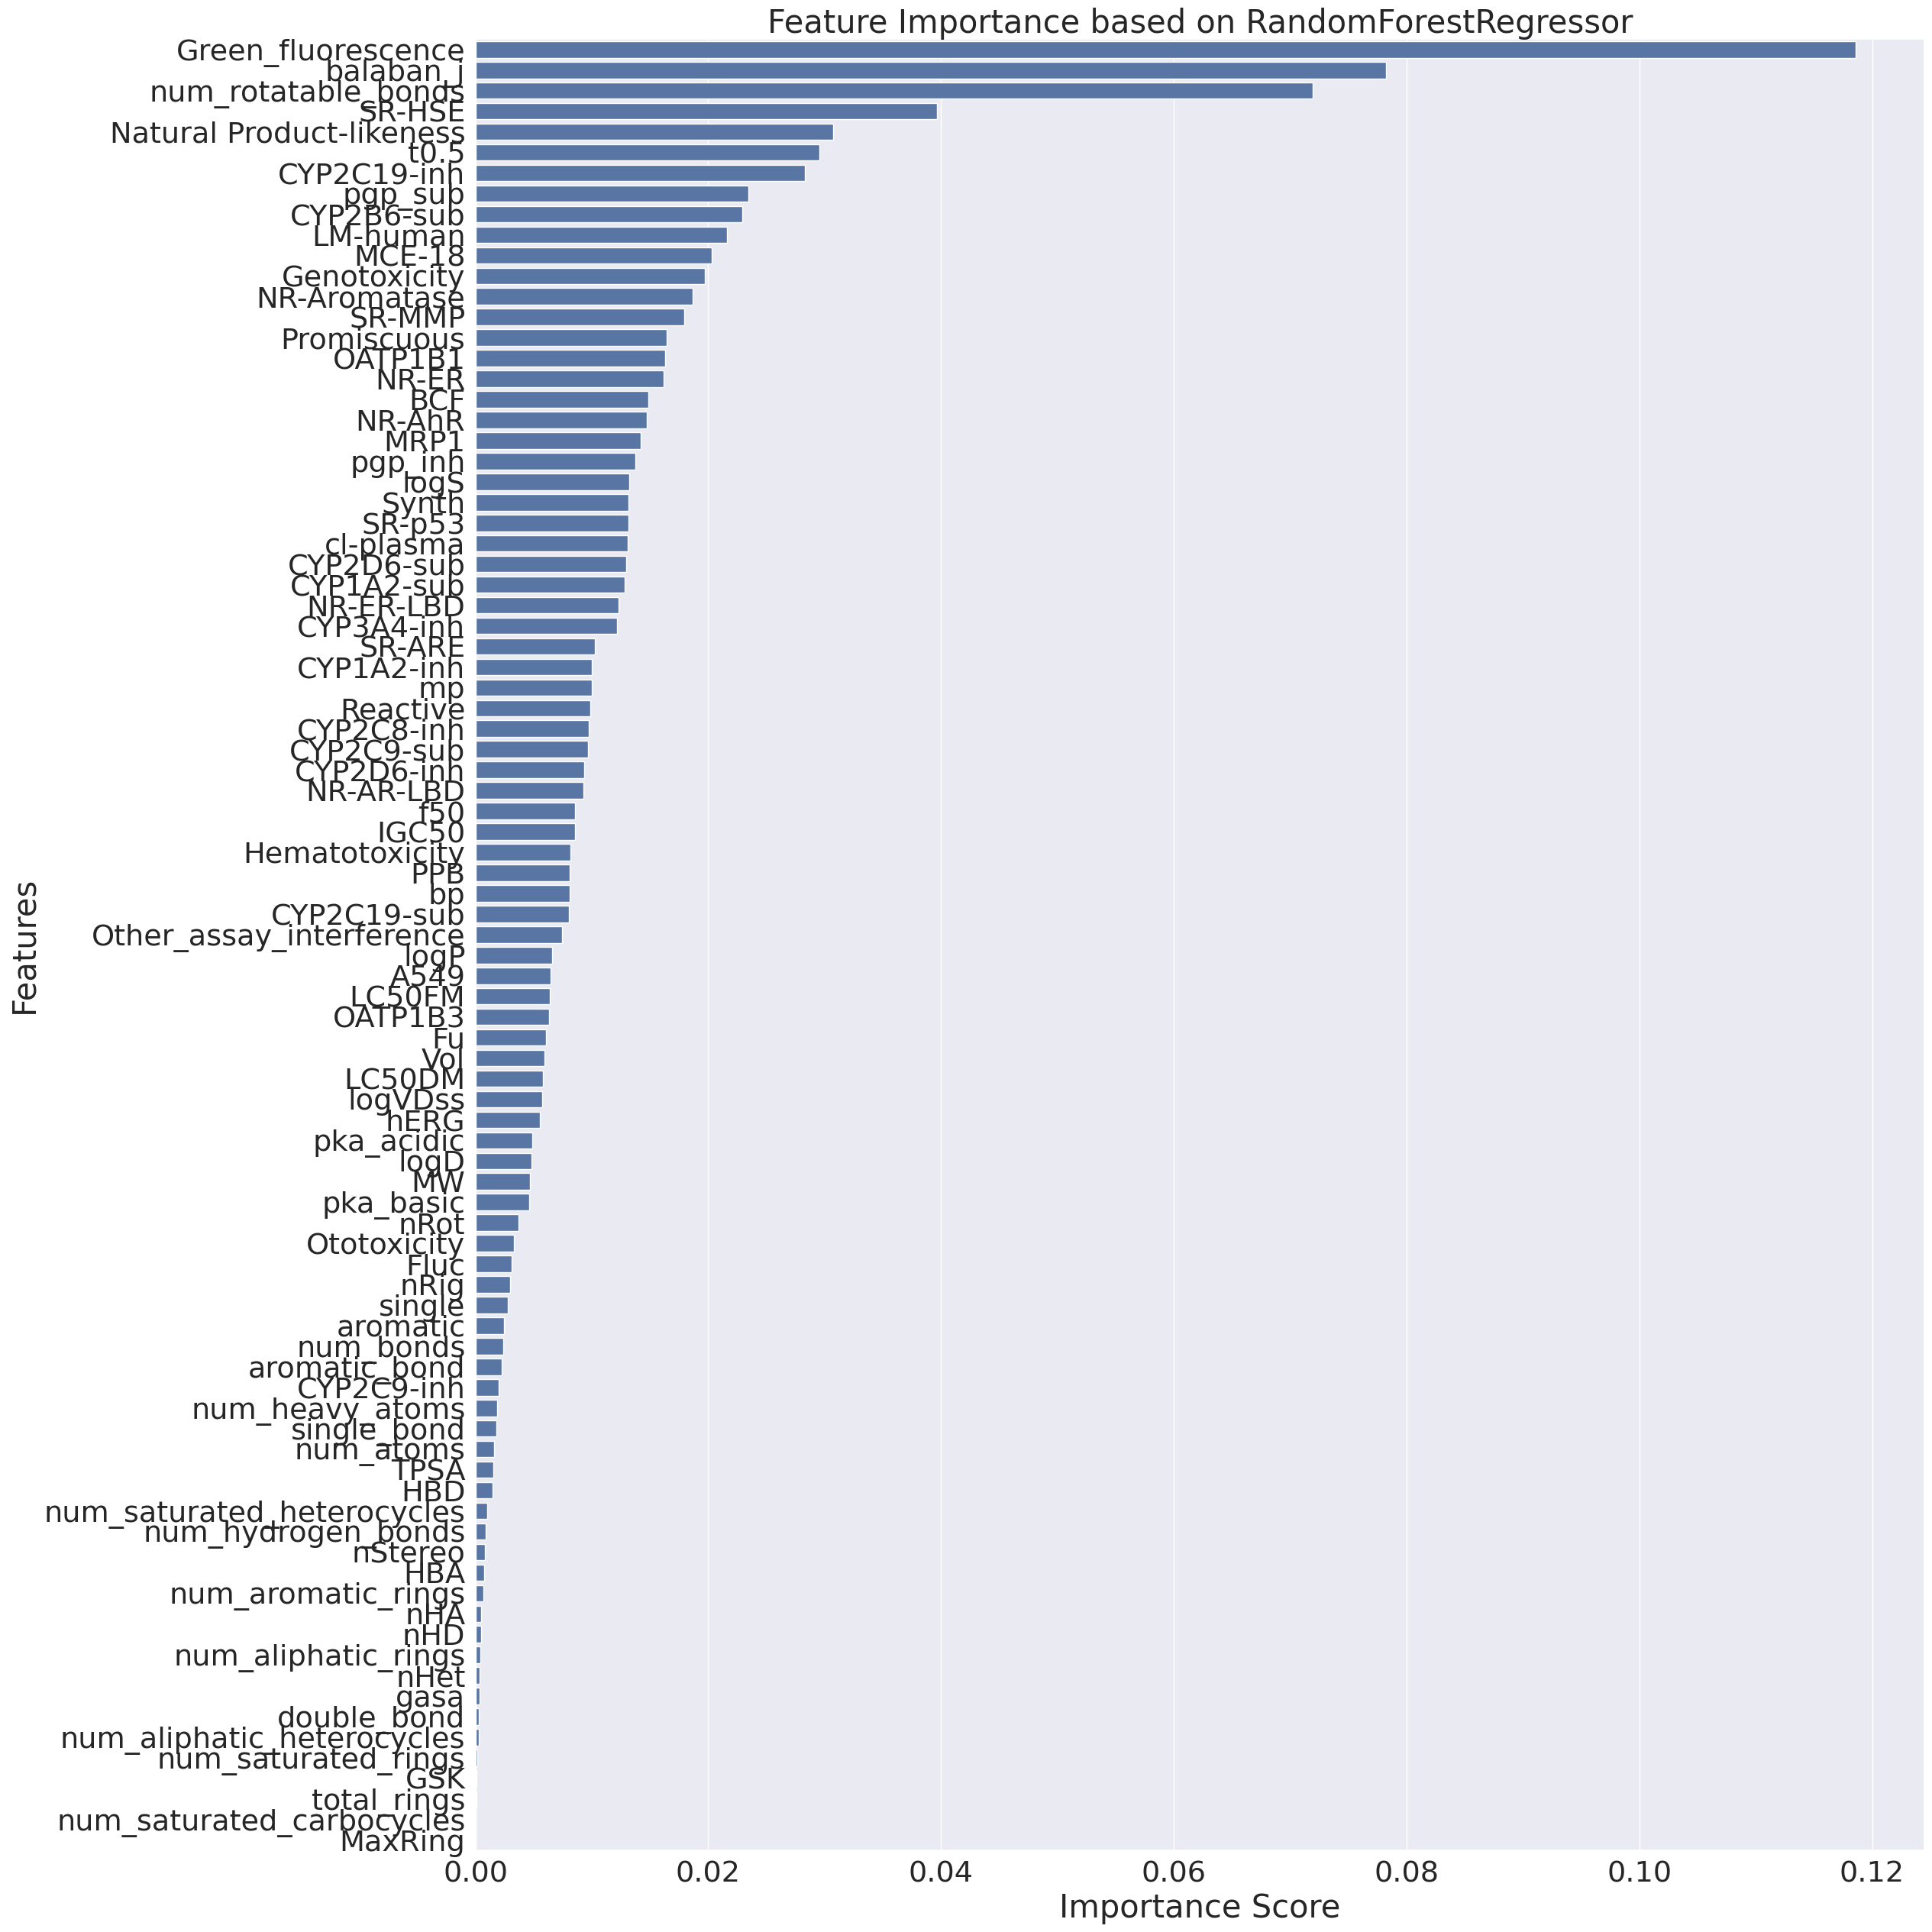

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经有了 feature_importances 这个 Series，它包含了每个特征的重要性评分

# 按重要性降序排序
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# 创建绘图空间，并设置大一点的字体大小
plt.figure(figsize=(26, 26))
sns.set(font_scale=2.5)  # 设置字体大小为1.5倍

# 使用 Seaborn 绘制横向条形图
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index, orient='h')

# 设置图表标题和标签
plt.title('Feature Importance based on RandomForestRegressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# 调整布局，使得标签不会被截断
plt.tight_layout()

# 保存为SVG格式，并设置DPI为600
plt.savefig('/content/feature_importance.svg', format='svg', dpi=600)
from google.colab import files
# 显示图表
plt.show()
files.download('/content/feature_importance.svg')


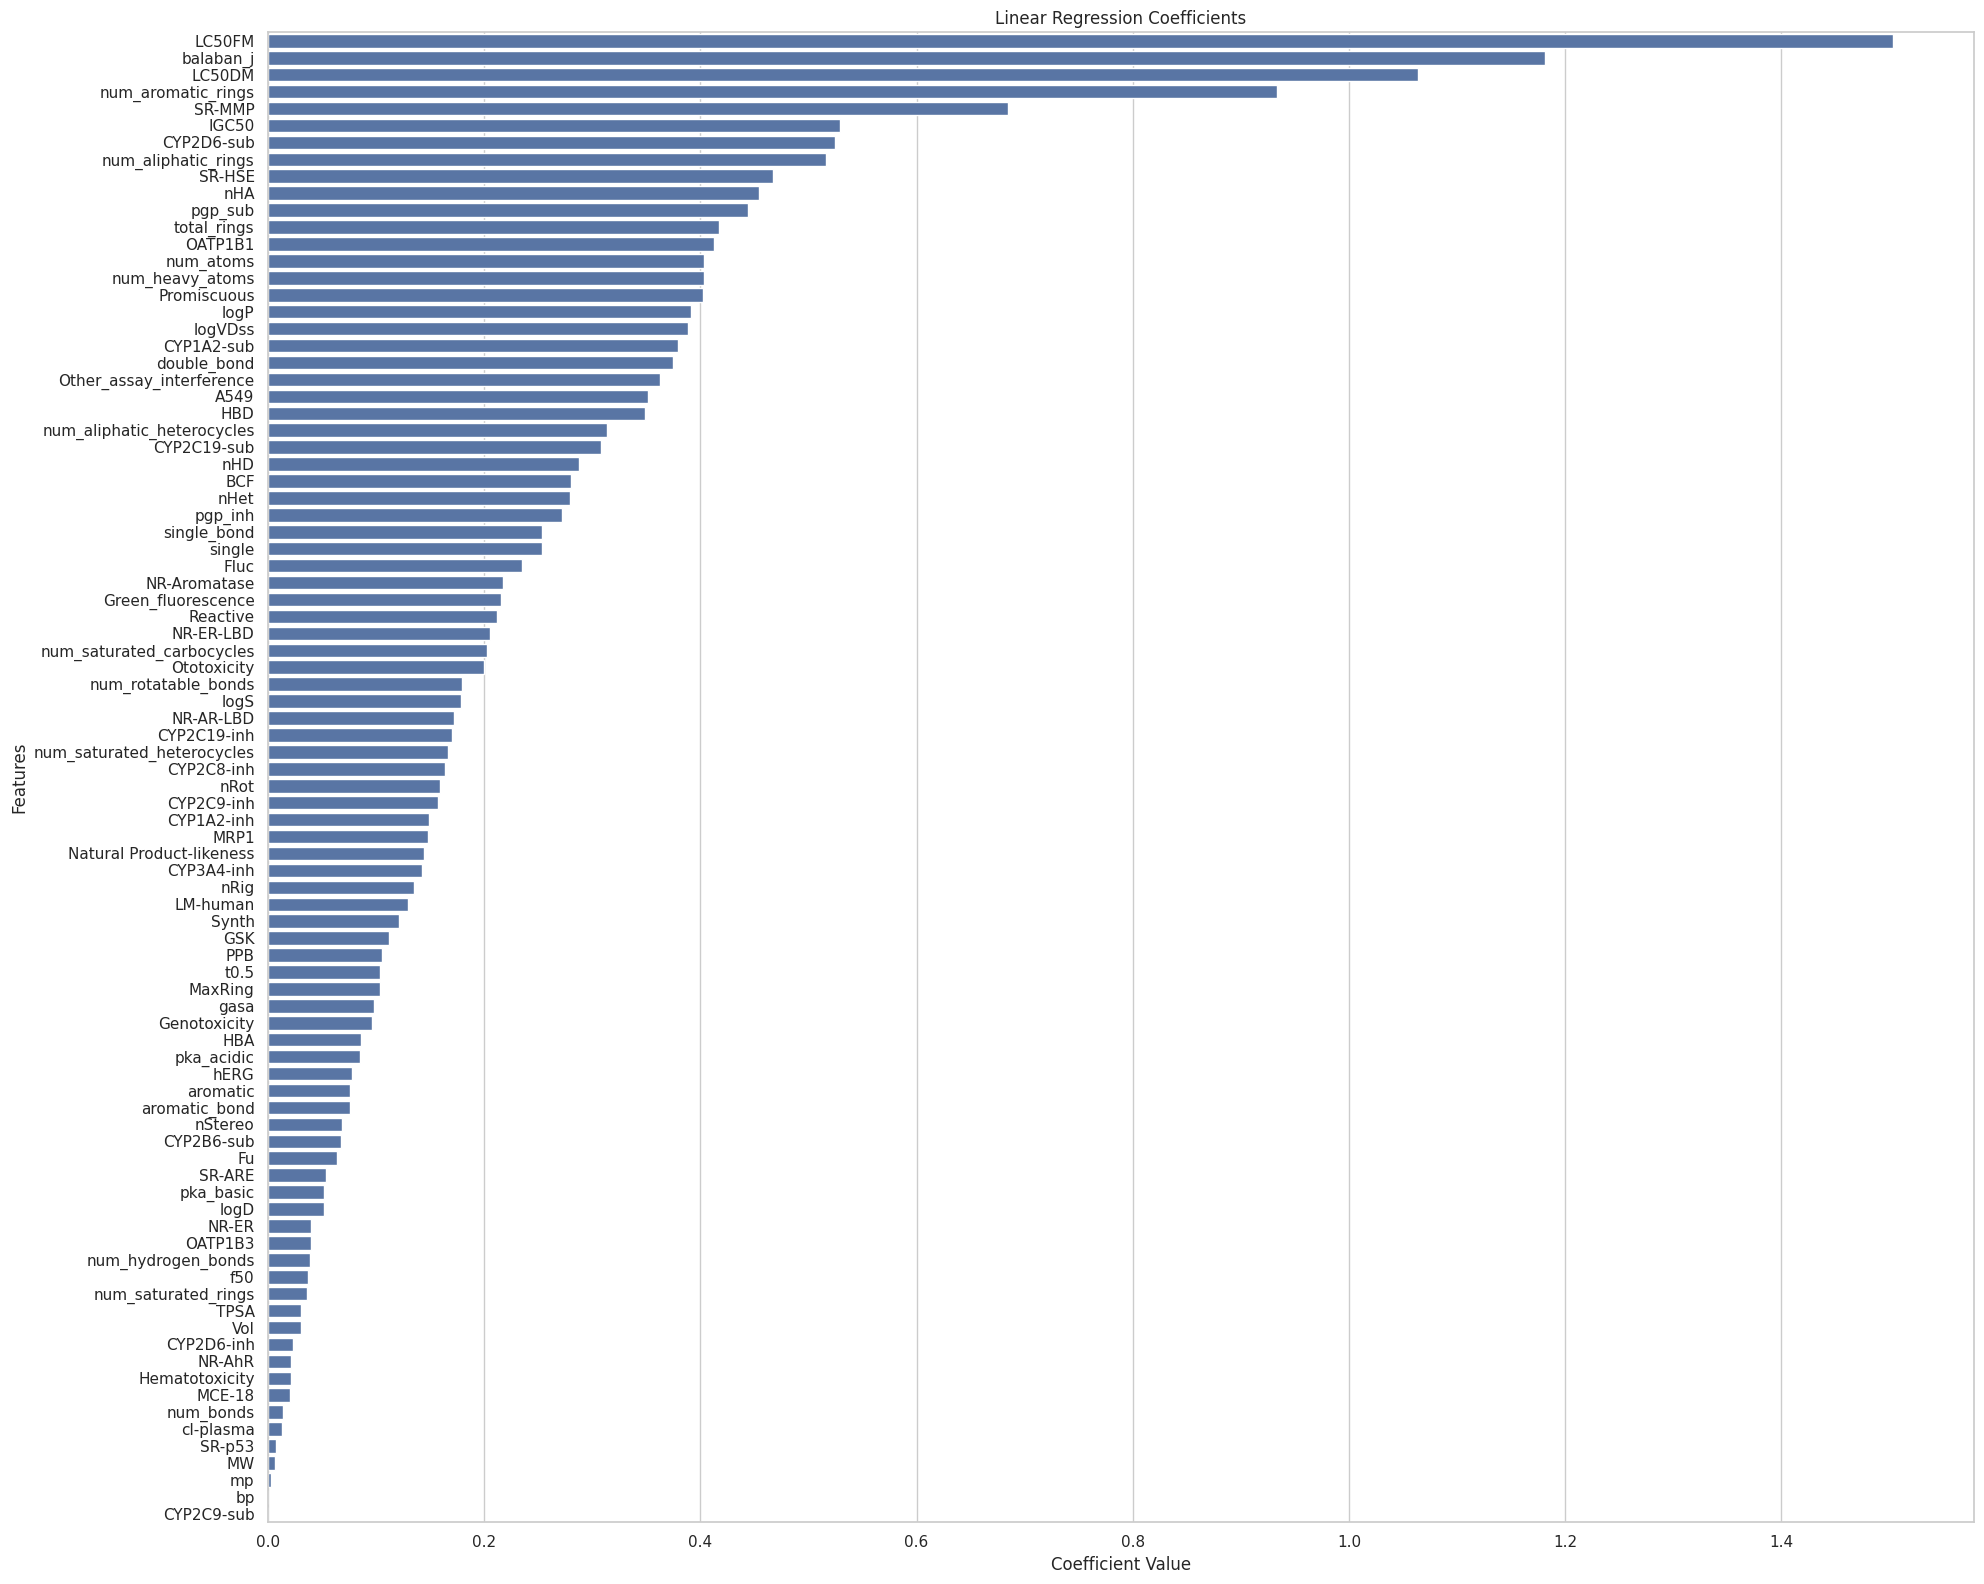

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 训练好的线性回归模型已经包含在上一个代码块中

# 获取线性回归模型的特征系数
feature_coefficients = pd.Series(model.coef_, index=filled_features_df.columns)

# 排序特征系数（按绝对值大小排序）
sorted_coefficients = feature_coefficients.abs().sort_values(ascending=False)

# 可视化特征系数
plt.figure(figsize=(20, 16))
sns.barplot(x=sorted_coefficients.values, y=sorted_coefficients.index, orient='h')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
